In [31]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [32]:
df = pd.read_csv("ufo.csv", index_col=0)
df.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [33]:
df["UFO_shape"].value_counts()

UFO_shape
Light        16565
Triangle      7865
Circle        7607
Fireball      6208
Other         5649
Unknown       5584
Sphere        5387
Disk          5213
Oval          3733
Formation     2457
Cigar         2057
Changing      1962
Flash         1328
Rectangle     1296
Cylinder      1283
Diamond       1178
Chevron        952
Egg            759
Teardrop       750
Cone           316
Cross          233
Delta            7
Round            2
Crescent         2
Pyramid          1
Flare            1
Hexagon          1
Dome             1
Changed          1
Name: count, dtype: int64

In [34]:
df["length_of_encounter_seconds"].value_counts().sort_index()

length_of_encounter_seconds
1.000000e-03       1
1.000000e-02       6
2.000000e-02       2
5.000000e-02       6
8.000000e-02       2
1.000000e-01       4
2.000000e-01       3
2.300000e-01       1
3.000000e-01       5
3.300000e-01       1
3.800000e-01       1
4.000000e-01       2
4.500000e-01       2
5.000000e-01      52
5.700000e-01       1
6.000000e-01       1
7.000000e-01       1
7.500000e-01       1
1.000000e+00     687
1.200000e+00      10
1.300000e+00       3
1.500000e+00      82
1.600000e+00       1
1.750000e+00       1
2.000000e+00    2171
2.500000e+00      21
2.510000e+00       1
3.000000e+00    1601
3.400000e+00       1
3.500000e+00      10
3.800000e+00       1
4.000000e+00     903
4.500000e+00       1
5.000000e+00    2941
5.500000e+00       3
6.000000e+00     510
6.500000e+00       1
7.000000e+00     448
8.000000e+00     437
9.000000e+00      62
1.000000e+01    3370
1.100000e+01      21
1.200000e+01     198
1.300000e+01      23
1.400000e+01      20
1.500000e+01    2128
1.6000

In [35]:
segundos = 9.783600e+07

# Convertir a minutos
minutos = segundos / 60

# Convertir a horas
horas = minutos / 60

print(f"{segundos} segundos son aproximadamente {minutos:.2f} minutos o {horas:.2f} horas.")

97836000.0 segundos son aproximadamente 1630600.00 minutos o 27176.67 horas.


In [36]:
df['length_of_encounter_seconds'] = df['length_of_encounter_seconds'].apply(lambda x: "{:.2f}".format(x))

In [37]:
import numpy as np

In [38]:
def cambiar_a_float(tiempo):
    try:
        return float(tiempo)
    except:
        return np.nan

In [39]:
# Convertir la columna a números
df["length_of_encounter_seconds"] = df["length_of_encounter_seconds"].apply(cambiar_a_float)


In [59]:
# Más de 12 días
x=(df["length_of_encounter_seconds"]/86400)>=1.250000e+01

In [60]:
x.value_counts().sort_index(ascending=False)

length_of_encounter_seconds
True        52
False    80276
Name: count, dtype: int64

In [61]:
df["length_of_encounter_seconds"].max() / 86400
#1132 días que equivale a 3 años y pico

1132.361111111111

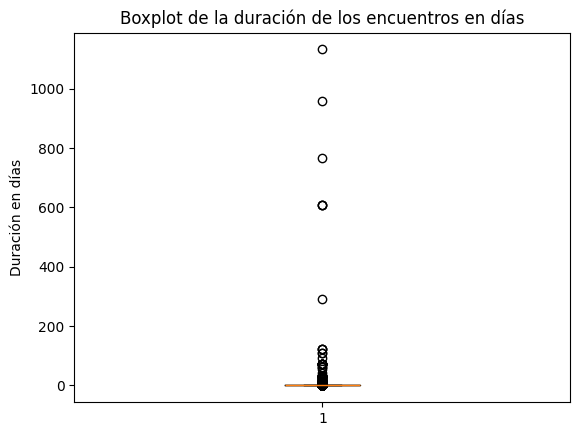

In [62]:
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame es df y la columna es 'length_of_encounter_seconds'
plt.boxplot(df['length_of_encounter_seconds'] / 86400)
plt.ylabel('Duración en días')
plt.title('Boxplot de la duración de los encuentros en días')
plt.show()

In [42]:
# Convertir la columna a números
df["length_of_encounter_seconds"] = df["length_of_encounter_seconds"].apply(cambiar_a_float)

# Definir los límites para las categorías
bins = [0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200, 1260, 1320, 1380, float('inf')]

# Definir los límites para las categorías
labels = ['0-1 h', '1-2 h', '2-3 h', '3-4 h', '4-5 h', '5-6 h', '6-7 h', '7-8 h', '8-9 h', '9-10 h', '10-11 h', '11-12 h', '12-13 h', '13-14 h', '14-15 h', '15-16 h', '16-17 h', '17-18 h', '18-19 h', '19-20 h', '21-22 h', '22-23 h', '23-24 h', '24+ h']

# Crear una nueva columna 'duration_category_hour' que contendrá las categorías
df['duration_category_hour'] = pd.cut(df['length_of_encounter_seconds'], bins=bins, labels=labels, right=False)

# Ahora, df['duration_category_hour'] contendrá las categorías correspondientes a las duraciones

In [45]:
df.to_csv("ufo_duration.csv")

In [43]:
df['duration_category_hour'].value_counts().sort_index()

duration_category_hour
0-1 h      23584
1-2 h       6780
2-3 h       7215
3-4 h       5103
4-5 h       2111
5-6 h       8657
6-7 h        653
7-8 h        887
8-9 h        592
9-10 h        93
10-11 h     6333
11-12 h       49
12-13 h      258
13-14 h       56
14-15 h       25
15-16 h     4059
16-17 h       48
17-18 h       53
18-19 h       59
19-20 h       36
21-22 h     2998
22-23 h       51
23-24 h       54
24+ h      10574
Name: count, dtype: int64

In [6]:
#df["Encounter_Duration"].value_counts()